In [1]:
print('test')

test


#### Performa siswa dengan melihat nilai akhir (G3) sebagai acuan/label

##### Import Libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os

##### Fetch File  

In [ ]:
import urllib.request

DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/static/public/320/'
STUDENT_PATH = os.path.join('datasets', 'student_performance')
STUDENT_URL = DOWNLOAD_ROOT + 'student+performance.zip'

def fetch_student_performance_data(student_url=STUDENT_URL, student_path=STUDENT_PATH):
    if not os.path.isdir(student_path):
        os.makedirs(student_path)
    zip_path = os.path.join(student_path, 'student_performance.zip')
    urllib.request.urlretrieve(student_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        f.extractall(path=student_path)
        print(f.namelist())
    

In [8]:
fetch_student_performance_data()

['.student.zip_old', 'student.zip']


##### Load Student File

In [59]:
def load_student_performance_data(student_path=STUDENT_PATH):
    # extract student.zip
    with zipfile.ZipFile(os.path.join(student_path, 'student.zip')) as f:
        if not os.path.isdir(student_path+'/student'):
            os.makedirs(student_path+'/student')
        f.extractall(student_path+'/student')
    # load data
    student_csv = os.path.join(student_path, 'student/student-mat.csv')
    return pd.read_csv(student_csv, sep=';')

In [60]:
student = load_student_performance_data()
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##### Data Explatory

In [61]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [62]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


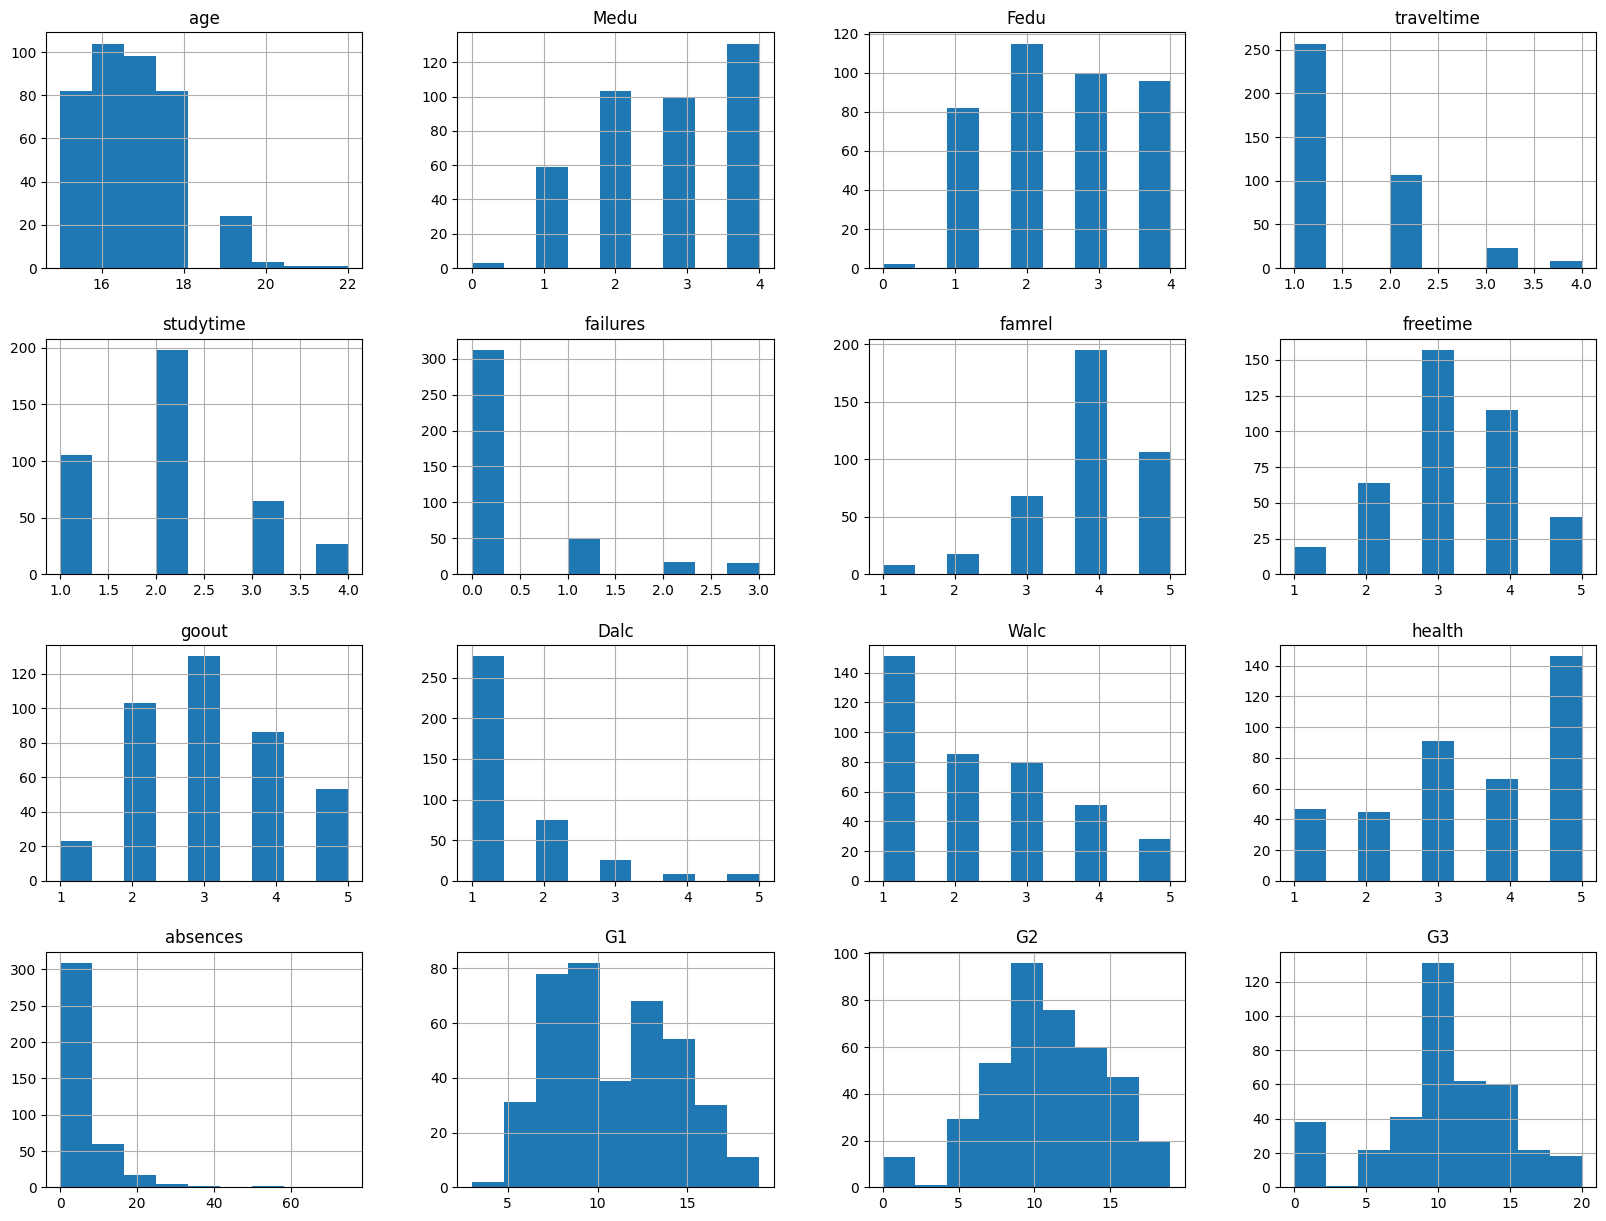

In [63]:
n_bins = int(np.log2(len(student)) + 1) # Sturges' formula
student.hist(bins=n_bins, figsize=(20,15))
plt.show()

In [64]:
# drop G1 and G2
student = student.drop(['G1', 'G2'], axis=1)

In [65]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(student, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((316, 31), (79, 31))

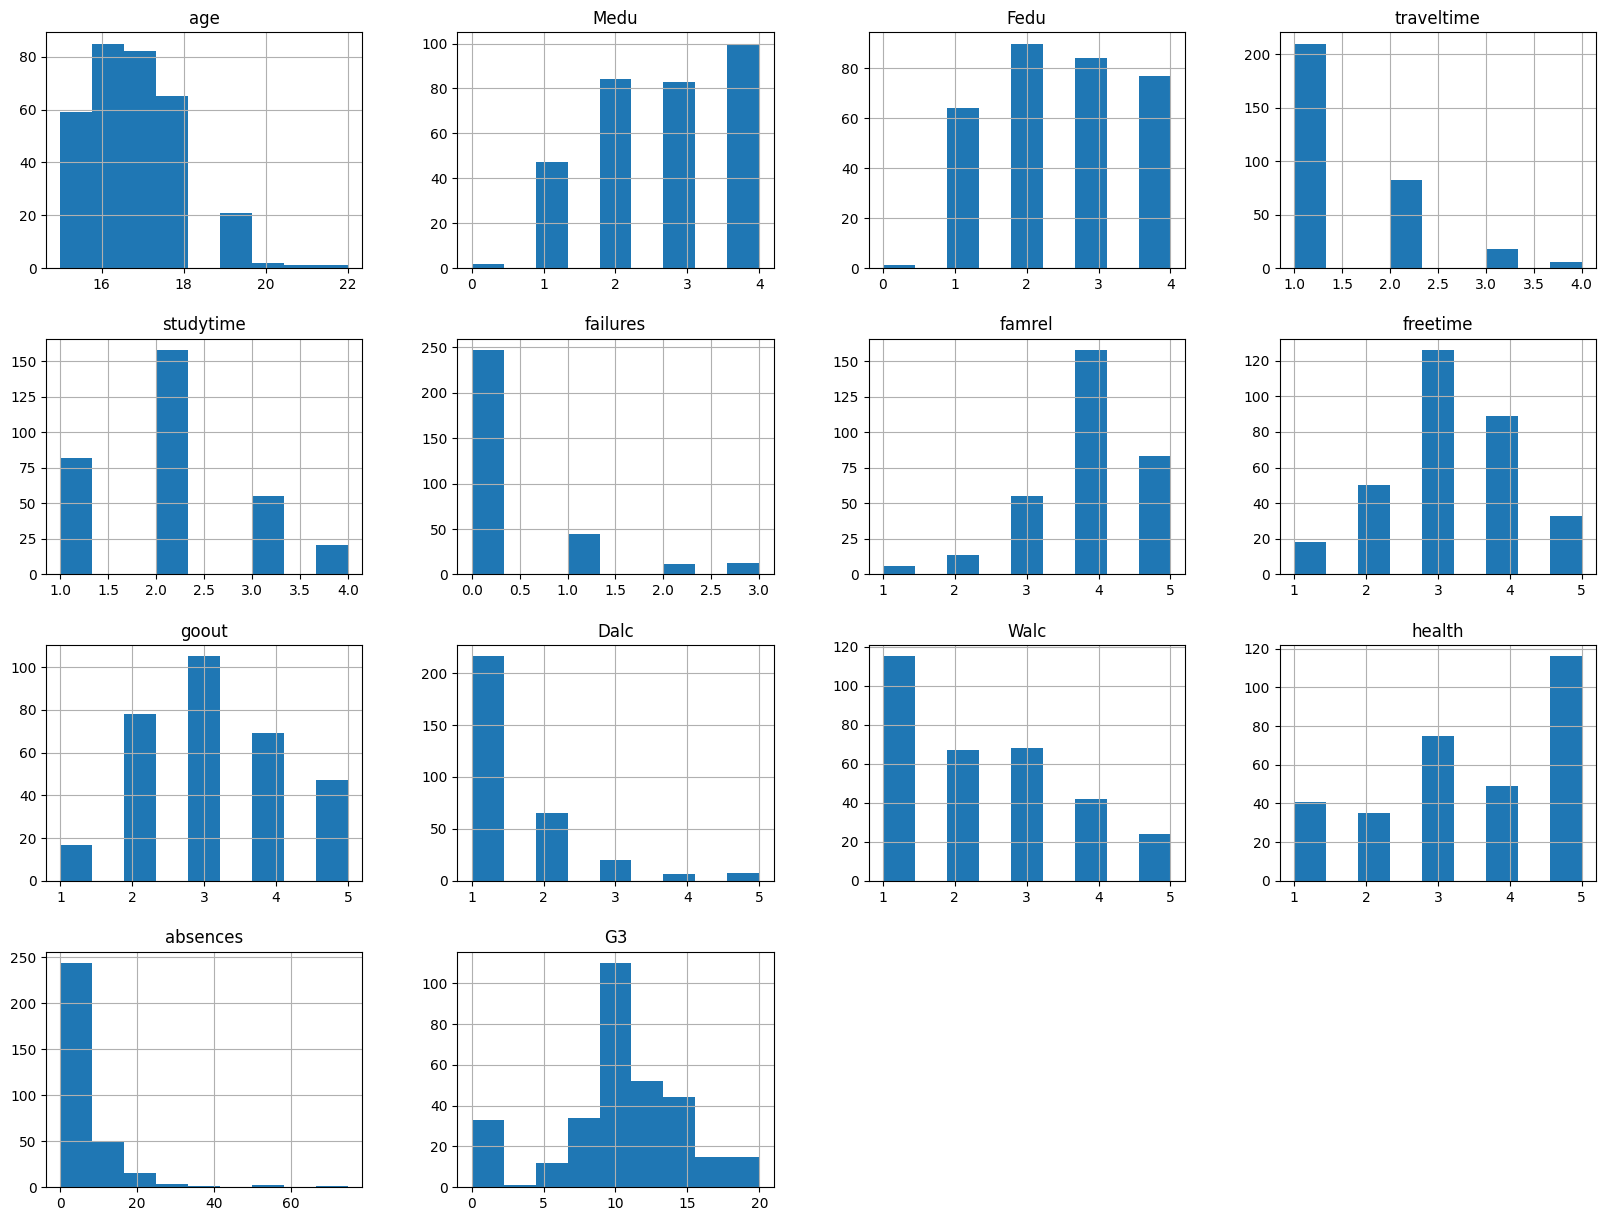

In [66]:
train_set.hist(bins=n_bins, figsize=(20,15))
plt.show()

In [67]:
student_num = train_set.copy()
for column in student.columns:
    student_num = student_num.drop(column, axis=1) if student_num[column].dtype == 'object' else student_num
student_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
181,16,3,3,1,2,0,4,2,3,1,2,3,2,12
194,16,2,3,2,1,0,5,3,3,1,1,3,0,14
173,16,1,3,1,2,3,4,3,5,1,1,3,0,0
63,16,4,3,1,3,0,3,4,4,2,4,4,2,9
253,16,2,1,2,1,0,3,3,2,1,3,3,0,8


In [68]:
corr_matrix = student_num.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
Medu          0.215968
studytime     0.138200
Fedu          0.135265
famrel        0.069409
absences      0.064607
freetime     -0.015244
Walc         -0.057363
Dalc         -0.064698
health       -0.068857
goout        -0.106024
traveltime   -0.106752
age          -0.146241
failures     -0.373769
Name: G3, dtype: float64

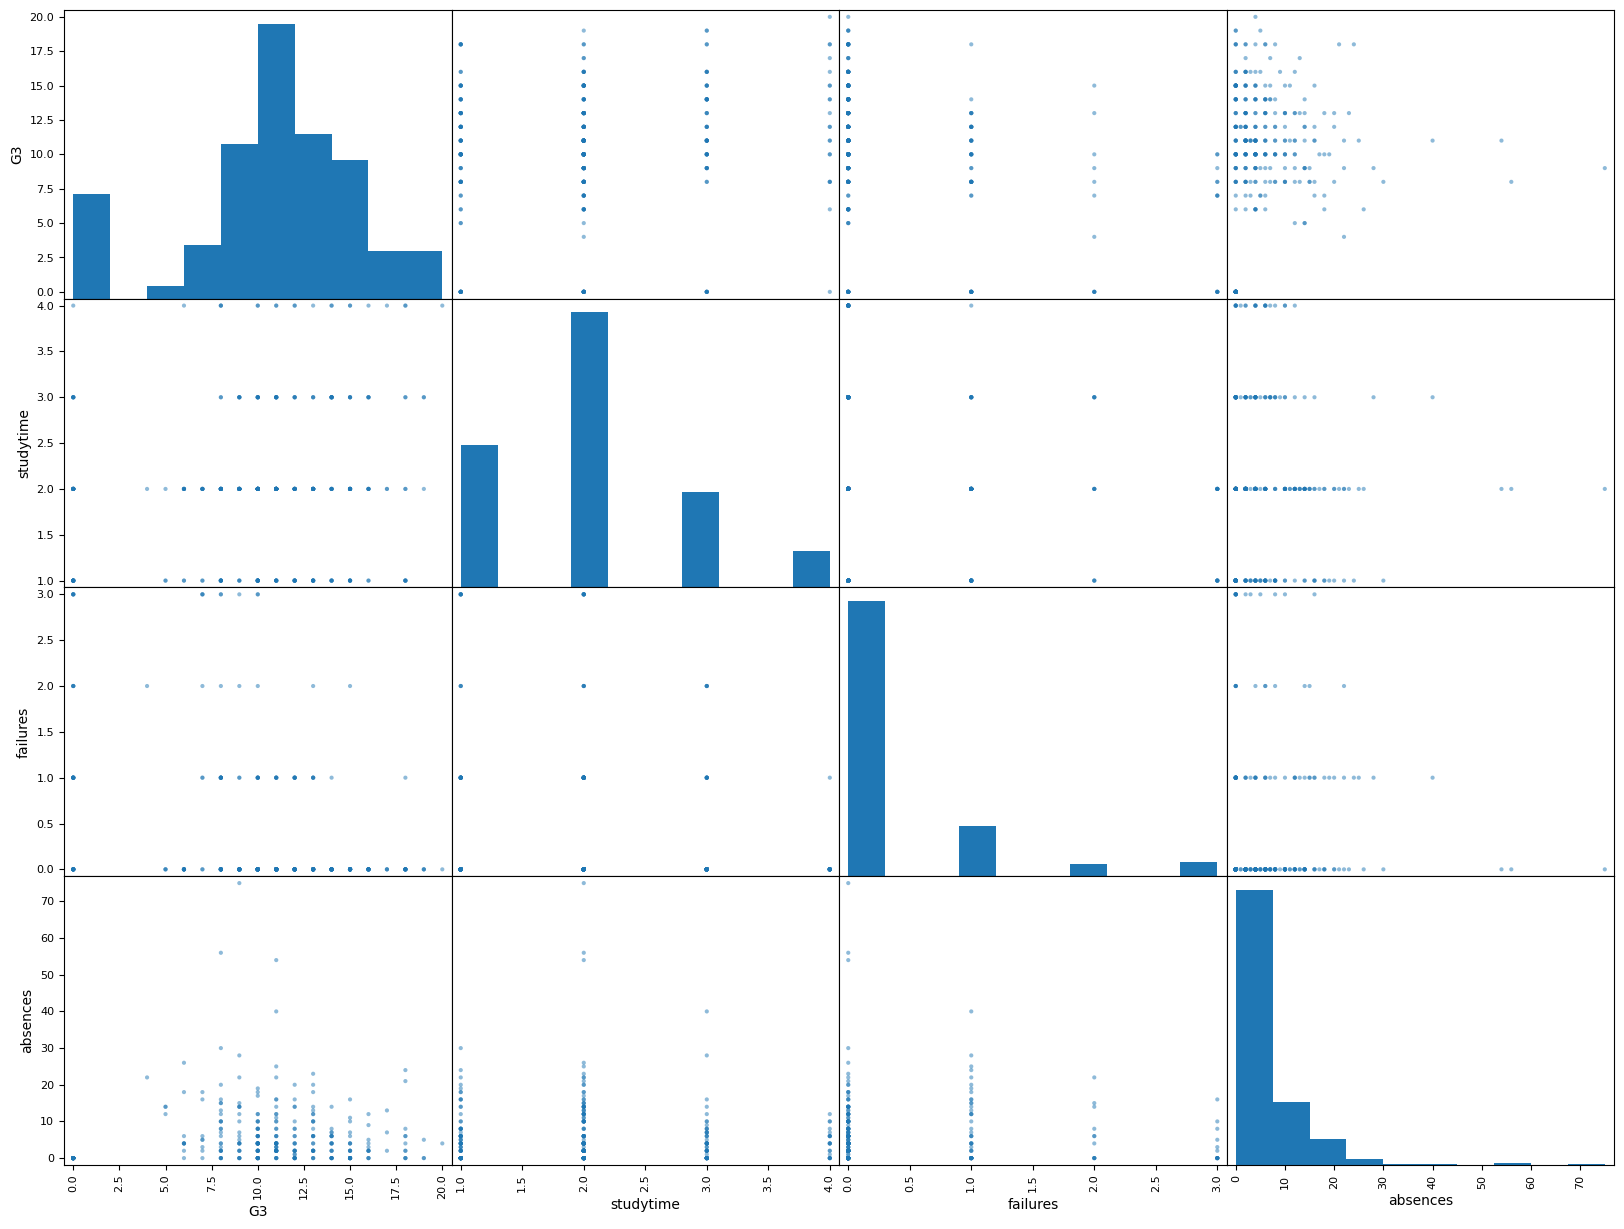

In [69]:
from pandas.plotting import scatter_matrix

attributes = ['G3', 'studytime', 'failures', 'absences']

scatter_matrix(student_num[attributes], figsize=(20,15))
plt.show()

##### Split predictors and labels   

In [70]:
student_num_predictors = student_num.drop('G3', axis=1)
student_num_labels = student_num['G3']

##### Handling Missing Values

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(student_num_predictors)



SimpleImputer(strategy='median')

In [73]:
imputer.statistics_

array([17.,  3.,  3.,  1.,  2.,  0.,  4.,  3.,  3.,  1.,  2.,  4.,  4.])

In [74]:
imputer.transform(student_num_predictors)

array([[16.,  3.,  3., ...,  2.,  3.,  2.],
       [16.,  2.,  3., ...,  1.,  3.,  0.],
       [16.,  1.,  3., ...,  1.,  3.,  0.],
       ...,
       [19.,  3.,  3., ...,  3.,  5., 15.],
       [17.,  4.,  3., ...,  3.,  4.,  0.],
       [15.,  4.,  4., ...,  1.,  5.,  4.]], shape=(316, 13))

In [75]:
student_num_predictors_tr = pd.DataFrame(imputer.transform(student_num_predictors), columns=student_num_predictors.columns)
student_num_predictors_tr.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,16.0,3.0,3.0,1.0,2.0,0.0,4.0,2.0,3.0,1.0,2.0,3.0,2.0
1,16.0,2.0,3.0,2.0,1.0,0.0,5.0,3.0,3.0,1.0,1.0,3.0,0.0
2,16.0,1.0,3.0,1.0,2.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,0.0
3,16.0,4.0,3.0,1.0,3.0,0.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0
4,16.0,2.0,1.0,2.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,3.0,0.0


##### Handling Text and Categorical Attributes

In [76]:
student_cat = student.copy()
student_cat = student_cat.drop(student_num.columns, axis=1)
student_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [99]:
binary_cat  = student_cat[['school','sex','address','famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
binary_cat.head()


,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,no,yes,yes,no,yes,yes,no,no


In [100]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

binary_cat_tr = binary_cat.copy()
for column in binary_cat.columns:
    binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])

binary_cat.head()


/tmp/ipykernel_5402/1544930050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])
/tmp/ipykernel_5402/1544930050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_cat[column] = labelEncoder.fit_transform(binary_cat[column])
/tmp/ipykernel_5402/1544930050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,1,0,1,1,0,0


In [80]:
non_binary_cat = student_cat.drop(binary_cat.columns, axis=1)
non_binary_cat.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [84]:
for column in non_binary_cat.columns:
    print(non_binary_cat[column].value_counts())

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
guardian
mother    273
father     90
other      32
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import chain

class MultiOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.oneHotEncoder = OneHotEncoder()
        self.categories_ = None
        
        if columns is not None:
            self.dictOfOneHotEncoder = {column: [None, None] for column in columns}
        else:
            self.dictOfOneHotEncoder = {
                'Mjob': [None, None],
                'Fjob': [None, None], 
                'reason': [None, None],
                'guardian': [None, None]
            }
        
    def fit(self, X, y=None):
        for column in X.columns:
            self.oneHotEncoder.fit(X[[column]])
            self.dictOfOneHotEncoder[column][0] = self.oneHotEncoder.categories_
        
        self.__unflattened_categories = [list(category[0][0]) for category in self.dictOfOneHotEncoder.values()]   
        self.categories_ = np.array(list(chain(*self.__unflattened_categories)))
        return self
    
    def transform(self, X): 
        for column in X.columns:
            self.dictOfOneHotEncoder[column][1] = self.oneHotEncoder.fit_transform(X[[column]])
        return np.array([transformed[1] for transformed in self.dictOfOneHotEncoder.values()])
    
    def fit_transform(self, X, y = None, **fit_params):
        return super().fit_transform(X, y, **fit_params)

# oneHotEncoder = OneHotEncoder()
# dictOfOneHotEncoder = {
#     'Mjob': [None, None],
#     'Fjob': [None, None], 
#     'reason': [None, None],
#     'guardian': [None, None]
# }
# for column in non_binary_cat.columns:
#     dictOfOneHotEncoder[column][1] = oneHotEncoder.fit_transform(non_binary_cat[[column]])
#     dictOfOneHotEncoder[column][0] = oneHotEncoder.categories_





In [ ]:
multiOneHotEncoder = MultiOneHotEncoder()
multiOneHotEncoder.fit_transform(non_binary_cat)


array([<Compressed Sparse Row sparse matrix of dtype 'float64'
       	with 395 stored elements and shape (395, 5)>          ,
       <Compressed Sparse Row sparse matrix of dtype 'float64'
       	with 395 stored elements and shape (395, 5)>          ,
       <Compressed Sparse Row sparse matrix of dtype 'float64'
       	with 395 stored elements and shape (395, 4)>          ,
       <Compressed Sparse Row sparse matrix of dtype 'float64'
       	with 395 stored elements and shape (395, 3)>          ],
      dtype=object)

(['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'])
